In [1]:
import tensorflow as tf                                                                                                 
from tensorflow.keras.datasets import fashion_mnist                                                                     
import matplotlib.pyplot as plt                                                                                         
                                                                                                                         
def main():                                                                                                             
    print('Hola Luis Fernando')                                                                                         
                                                                                                                        
def data():
    ## Cargar la base de datos para pruebas
    (x_train, _), (x_test, _) = fashion_mnist.load_data()                                                               
    print('Max value in the x_train is', x_train[0].max())                                                              
    print('Min value in the x_train is', x_train[0].min())                                                              
    return x_train,x_test                                                                                               
                                                                                                                      
def show_figure(x_test):  
    ## Generar una figura vacia
    fig, axs = plt.subplots(5, 10)                                                                                      
    fig.tight_layout(pad=-1)                                                                                            
    plt.gray()                                                                                                          
    a=0                                                                                                                 
    for i in range(5):                                                                                                  
        for j in range(10):    
            ## Graficar en cada posicon del subplot
            axs[i, j].imshow(tf.squeeze(x_test[a]))                                                                                                                                              
            a = a+1  
            
def show_one(x_test,i):
    ## Funcion para verificar solo una Imagen
    fig, axs = plt.subplots(1, 1)  
    fig.tight_layout(pad=-1)                                                                                            
    plt.gray()  
    axs.imshow(tf.squeeze(x_test[i]))  
    

def normalization(train, test):
    ## Normalizacion de los valores se colocan entre 0-1
    train_n = train.astype('float32')/255
    test_n = test.astype('float32')/255
    train_n = train_n[...,tf.newaxis]
    test_n = test_n[...,tf.newaxis]
    return train_n, test_n

def noisy(train, test, noisy_factor=0.1):
    ## Aumentor ruido artificial a las imagenes
    x_train_noisy = train + noisy_factor*tf.random.normal(shape = train.shape)
    x_test_noisy = test + noisy_factor*tf.random.normal(shape = test.shape)
    
    x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.) 
    x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)
    return x_train_noisy, x_test_noisy

def plot_noisy(original, noisy,n=5):
    plt.figure(figsize=(20,8))
    plt.gray()
    
    for i in range(n):
        ax = plt.subplot(2, n , i+1)
        plt.title("Original",size=20)
        plt.imshow(tf.squeeze(original[i]))
        plt.gray()
        bx = plt.subplot(2, n, n+ i +1) 
        plt.title("original + noise", size=20) 
        plt.imshow(tf.squeeze(noisy[i])) 
    plt.show()

In [2]:
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, Input

class NoiseReducer(tf.keras.Model): 
  def __init__(self):

    super(NoiseReducer, self).__init__() 

    self.encoder = tf.keras.Sequential([ 
      Input(shape=(28, 28, 1)), 
      Conv2D(16, (3,3), activation='relu', padding='same', strides=2), 
      Conv2D(8, (3,3), activation='relu', padding='same', strides=2)]) 
    
    self.decoder = tf.keras.Sequential([ 
      Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'), 
      Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'), 
      Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')]) 
  
  def call(self, x): 
    encoded = self.encoder(x) 
    decoded = self.decoder(encoded) 
    return decoded

In [3]:
main()

Hola Luis Fernando


In [23]:
x_train, x_test = data()

Max value in the x_train is 255
Min value in the x_train is 0


In [24]:
x_test.shape

(10000, 28, 28)

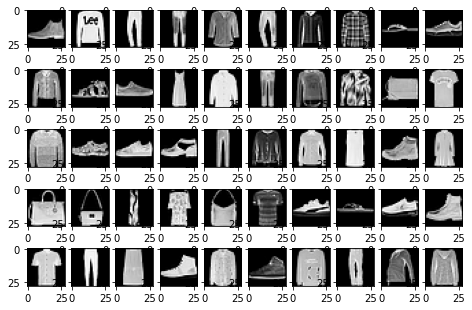

In [6]:
show_figure(x_test)

In [7]:
x_train_n, x_test_n =normalization(x_train, x_test)

In [22]:
x_train_n.shape

(60000, 28, 28, 1)

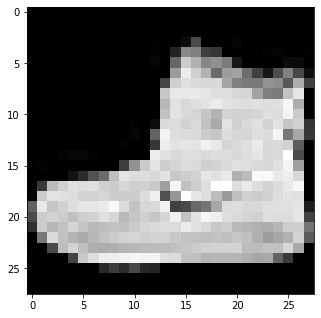

In [9]:
show_one(x_train_n,0)

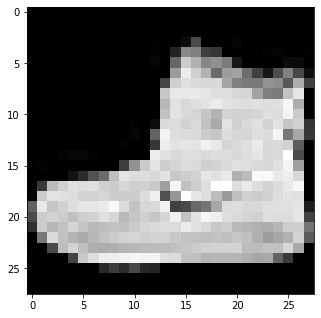

In [10]:
show_one(x_train,0)

In [11]:
x_train_noisy, x_test_noisy =noisy(x_train_n, x_test_n,0.4)

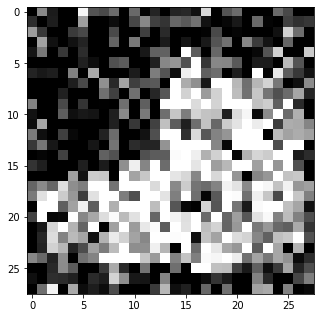

In [12]:
show_one(x_train_noisy,0)

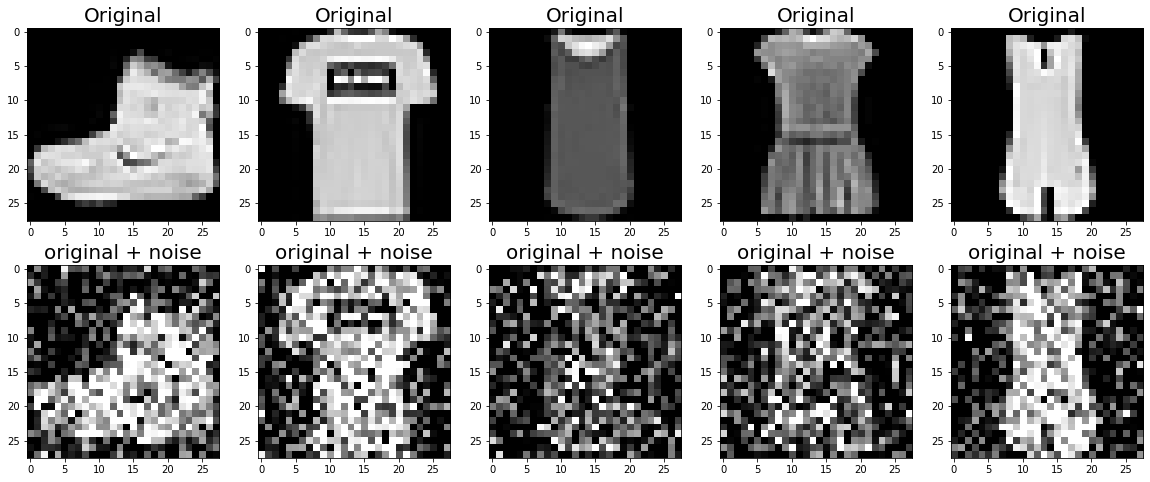

In [13]:
plot_noisy(x_train_n,x_train_noisy)

In [14]:
autoencoder = NoiseReducer()

In [15]:
autoencoder.compile(optimizer='adam', loss='mse')

In [16]:
autoencoder.fit(x_train_noisy, 
                x_train_n, 
                epochs=10, 
                shuffle=True, 
                validation_data=(x_test_noisy, x_test_n))

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0381 - val_loss: 0.0170
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0166 - val_loss: 0.0160
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0157 - val_loss: 0.0154
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0152 - val_loss: 0.0151
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0149 - val_loss: 0.0147
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0146 - val_loss: 0.0145
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0144 - val_loss: 0.0143
Epoch 8/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0142 - val_loss: 0.0143
Epoch 9/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0141 - val_loss: 0.0144
Epoch 10/10
1875/1875 [==============================] - 38s 20m

In [21]:
encoded_imgs=autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs=autoencoder.decoder(encoded_imgs)
decoded_imgs.shape

TensorShape([10000, 28, 28, 1])

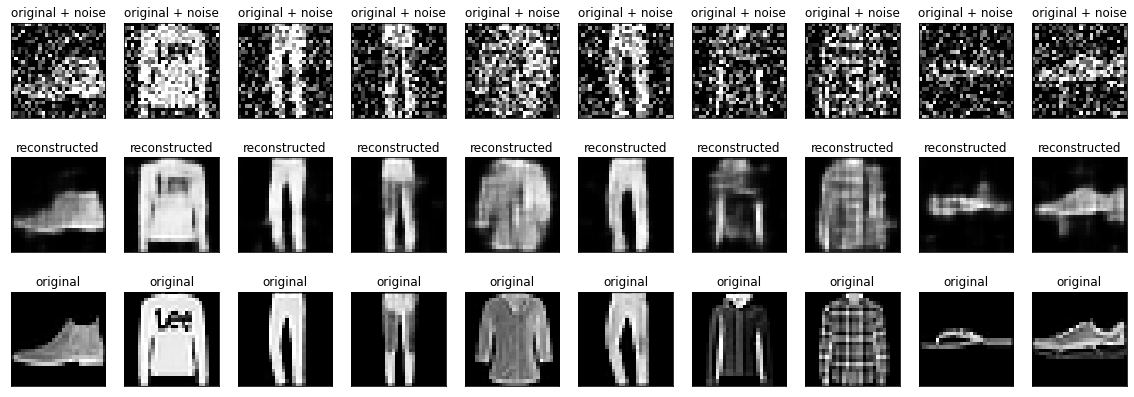

In [20]:
n = 10 
plt.figure(figsize=(20, 7))
plt.gray()
for i in range(n): 
  # display original + noise 
    bx = plt.subplot(3, n, i + 1) 
    plt.title("original + noise") 
    plt.imshow(tf.squeeze(x_test_noisy[i])) 
    bx.get_xaxis().set_visible(False) 
    bx.get_yaxis().set_visible(False) 

    # display reconstruction 
    cx = plt.subplot(3, n, i + n + 1) 
    plt.title("reconstructed") 
    plt.imshow(tf.squeeze(decoded_imgs[i])) 
    cx.get_xaxis().set_visible(False) 
    cx.get_yaxis().set_visible(False) 

    # display original 
    ax = plt.subplot(3, n, i + 2*n + 1) 
    plt.title("original") 
    plt.imshow(tf.squeeze(x_test[i])) 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

plt.show()